# Synthetic Dataset Creation

## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create Dataset

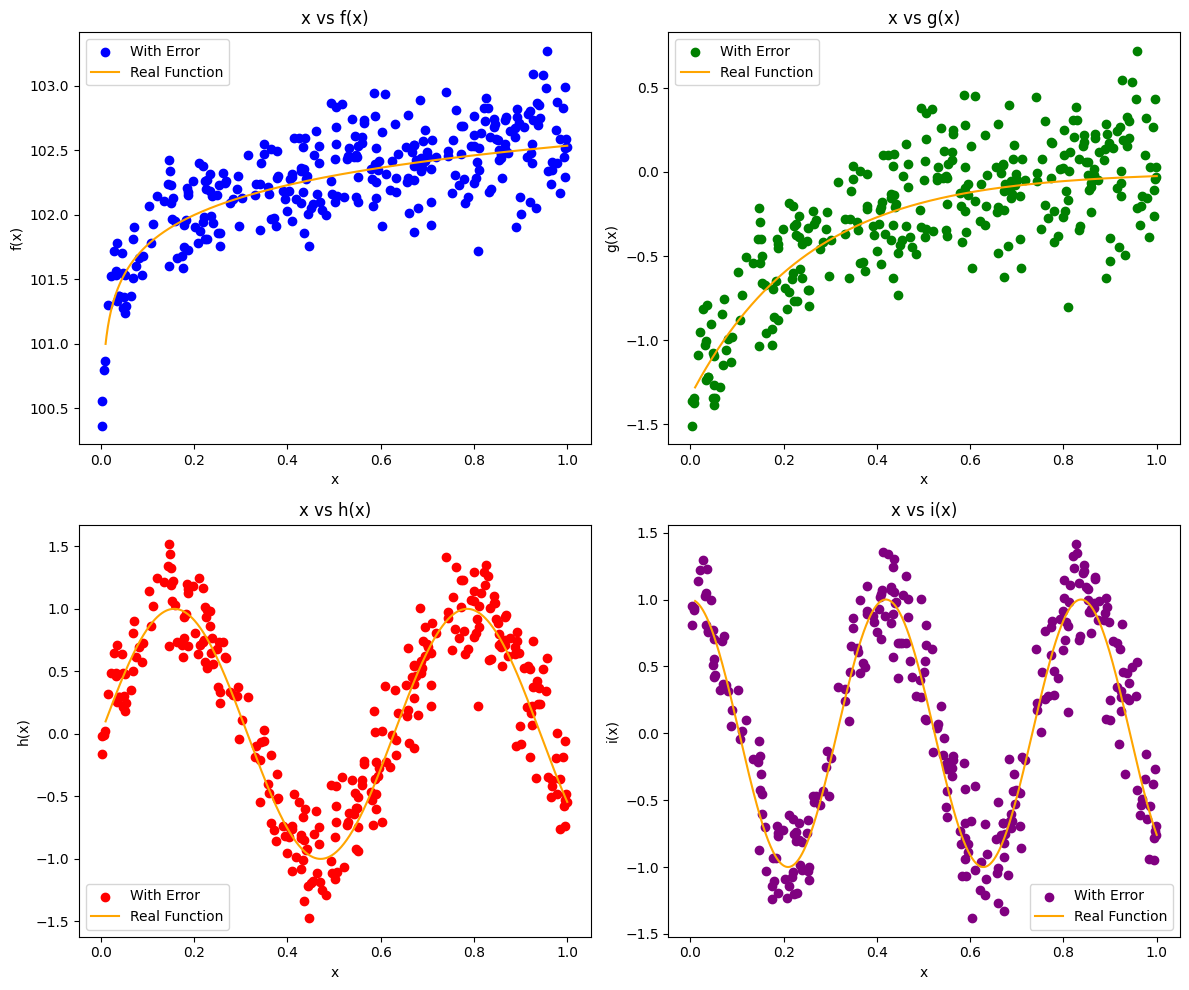

In [12]:
# Define the functions
def f(x0):
    return (1/3) * np.log(100 * x0) + 101

def g(x1):
    return (-4/3) * np.exp(-4 * np.abs(x1))

def h(x2):
    return np.sin(10 * x2)

def i(x2):
    return np.cos(15 * x2)

# Adjustable number of samples
n = 300  # You can change this value

# Generate uniform distributed values between [0, 1] for x
uniform_x_values = np.random.uniform(0, 1, n)

# Generate error term with standard deviation of 0.25
# Here y is sampled from a normal distribution with mean 0 and sd 1
error = np.random.normal(0, 0.25, n)

# Generate synthetic data with error term
uniform_data = {
    'x': uniform_x_values,
    'f(x)': [f(x) if x > 0 else 'undefined' for x in uniform_x_values] + error,
    'g(x)': g(uniform_x_values) + error,
    'h(x)': h(uniform_x_values) + error,
    'i(x)': i(uniform_x_values) + error,
    'y' : np.random.normal(0, 1, n)
}

# Create DataFrame
uniform_df = pd.DataFrame(uniform_data)

# Generate line values for the real functions
x_line = np.linspace(0.01, 1, 1000)  # Fine grid for smooth lines

line_data = {
    'x': x_line,
    'f(x)': f(x_line),
    'g(x)': g(x_line),
    'h(x)': h(x_line),
    'i(x)': i(x_line)
}

# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for f(x)
axs[0, 0].scatter(uniform_df['x'], uniform_df['f(x)'], color='blue', label='With Error')
axs[0, 0].plot(line_data['x'], line_data['f(x)'], color='orange', label='Real Function')
axs[0, 0].set_title('x vs f(x)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].legend()

# Plot for g(x)
axs[0, 1].scatter(uniform_df['x'], uniform_df['g(x)'], color='green', label='With Error')
axs[0, 1].plot(line_data['x'], line_data['g(x)'], color='orange', label='Real Function')
axs[0, 1].set_title('x vs g(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('g(x)')
axs[0, 1].legend()

# Plot for h(x)
axs[1, 0].scatter(uniform_df['x'], uniform_df['h(x)'], color='red', label='With Error')
axs[1, 0].plot(line_data['x'], line_data['h(x)'], color='orange', label='Real Function')
axs[1, 0].set_title('x vs h(x)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('h(x)')
axs[1, 0].legend()

# Plot for i(x)
axs[1, 1].scatter(uniform_df['x'], uniform_df['i(x)'], color='purple', label='With Error')
axs[1, 1].plot(line_data['x'], line_data['i(x)'], color='orange', label='Real Function')
axs[1, 1].set_title('x vs i(x)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('i(x)')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()